# Epilepsy EEG Analysis

## 1. Reading EDF Data

In [2]:
#pip install pyedflib

import pyedflib
import numpy as np

#downloaded from https://physionet.org/pn6/chbmit/chb01/

f = pyedflib.EdfReader("../chb01_01.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

## 2. Plotting First 5 Channels
### Non-Seizure Episode

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

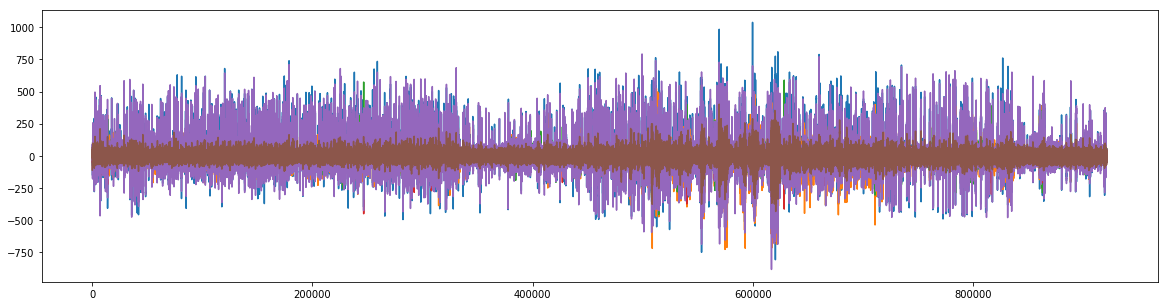

In [4]:
plt.figure(figsize=(20,5))

#X dimension is the ECG channel

plt.plot(sigbufs[0])
plt.plot(sigbufs[1])
plt.plot(sigbufs[2])
plt.plot(sigbufs[3])
plt.plot(sigbufs[4])
plt.plot(sigbufs[5])

## 3. Seizure Episode

In [5]:
#pip install pyedflib

import pyedflib
import numpy as np

#downloaded from https://physionet.org/pn6/chbmit/chb01/

f = pyedflib.EdfReader("../chb01_03.edf")

#total monitored time for this file: 1 hour
#in this file there is a seizure between 2996 seconds and 3036 seconds

n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

In [ ]:
#rolling average

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

## 4. Plotting First 5 Channels, Seizure Episode and Rolling Averages

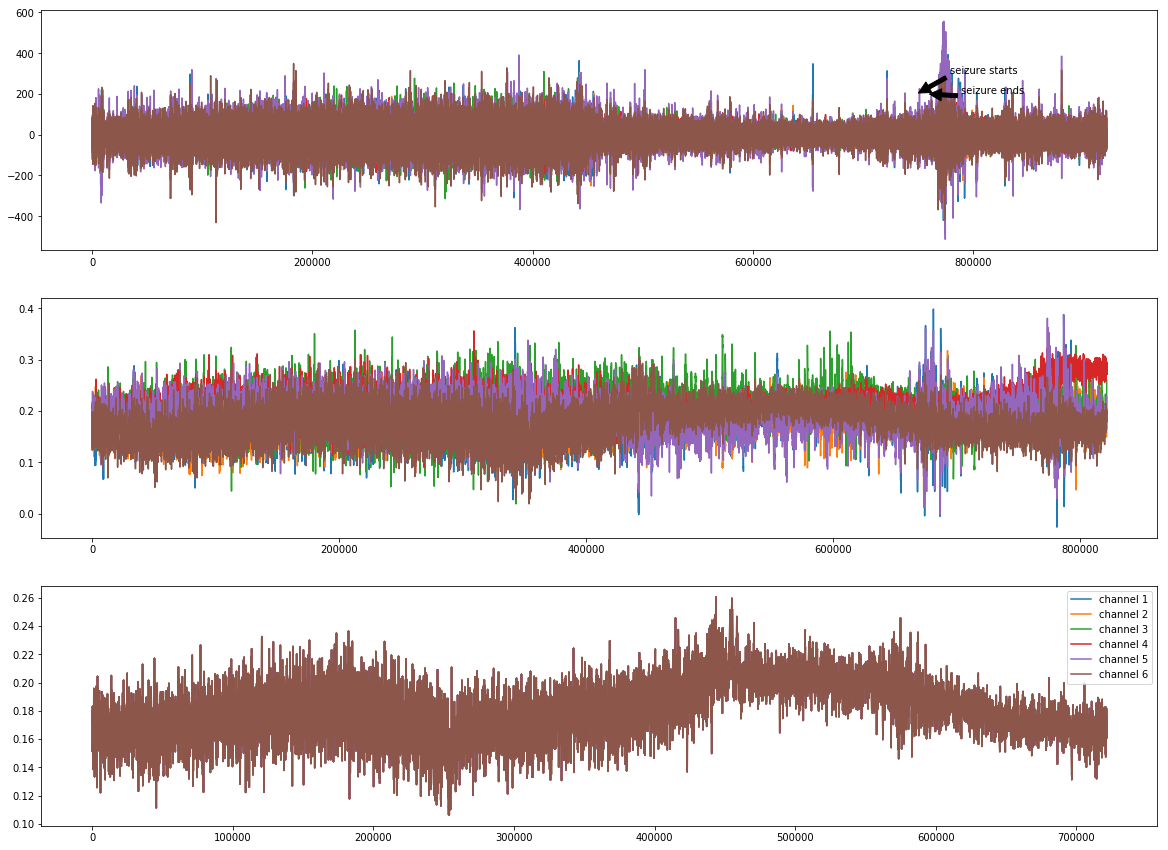

In [35]:
fig, ax = plt.subplots(3,1, figsize=(20,15))

#X dimension is the ECG channel

ax[0].plot(sigbufs[0], label='channel 1')
ax[0].plot(sigbufs[1], label='channel 2')
ax[0].plot(sigbufs[2], label='channel 3')
ax[0].plot(sigbufs[3], label='channel 4')
ax[0].plot(sigbufs[4], label='channel 5')
ax[0].plot(sigbufs[5], label='channel 6')

ax[0].annotate('seizure starts', xy=(2996*250, 200), xytext=(2996*260, 300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax[0].annotate('seizure ends', xy=(3036*250, 200), xytext=(3036*260, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax[1].plot(moving_average(sigbufs[0], n=100000), label='channel 1')
ax[1].plot(moving_average(sigbufs[1], n=100000), label='channel 2')
ax[1].plot(moving_average(sigbufs[2], n=100000), label='channel 3')
ax[1].plot(moving_average(sigbufs[3], n=100000), label='channel 4')
ax[1].plot(moving_average(sigbufs[4], n=100000), label='channel 5')
ax[1].plot(moving_average(sigbufs[5], n=100000), label='channel 6')

ax[2].plot(moving_average(sigbufs[5], n=200000), label='channel 1')
ax[2].plot(moving_average(sigbufs[5], n=200000), label='channel 2')
ax[2].plot(moving_average(sigbufs[5], n=200000), label='channel 3')
ax[2].plot(moving_average(sigbufs[5], n=200000), label='channel 4')
ax[2].plot(moving_average(sigbufs[5], n=200000), label='channel 5')
ax[2].plot(moving_average(sigbufs[5], n=200000), label='channel 6')

plt.legend()

## 5. Plotting Channel 5 and Rolling Averages

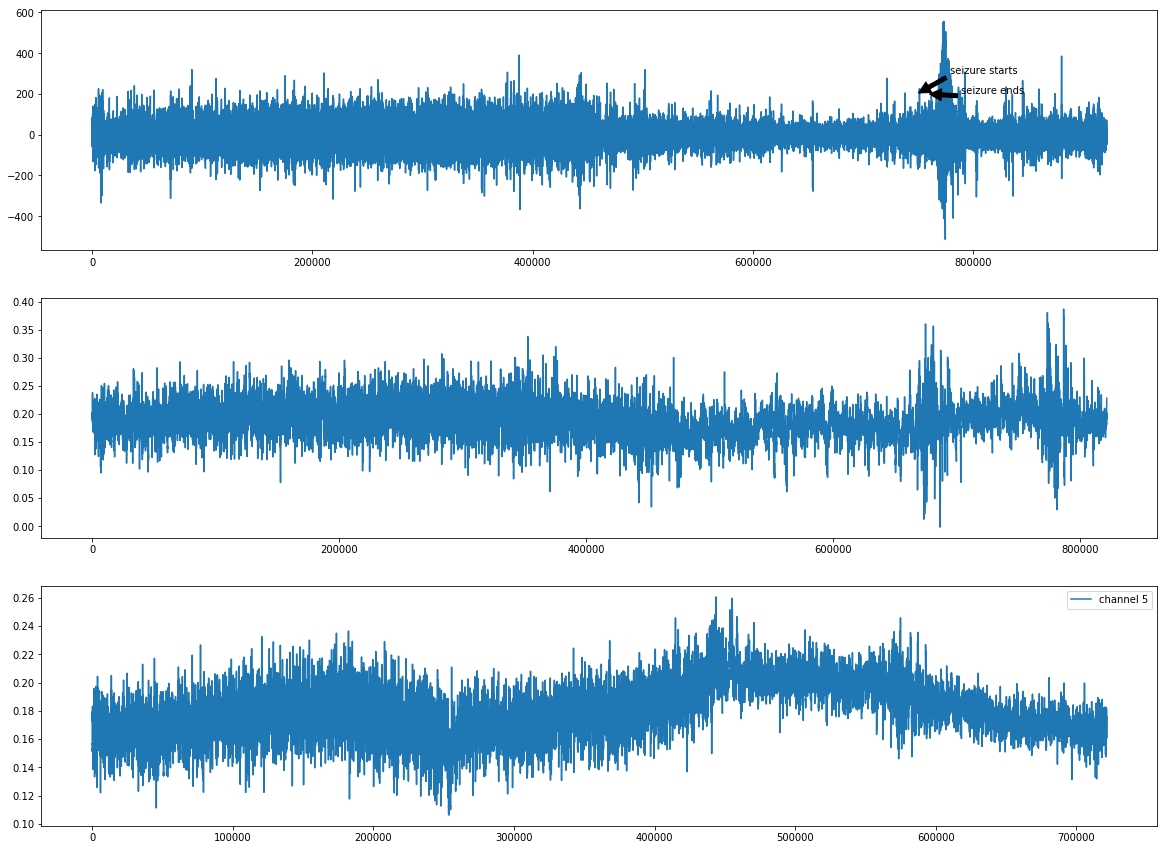

In [34]:
fig, ax = plt.subplots(3,1, figsize=(20,15))

#X dimension is the ECG channel

ax[0].plot(sigbufs[4], label='channel 5')

ax[0].annotate('seizure starts', xy=(2996*250, 200), xytext=(2996*260, 300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax[0].annotate('seizure ends', xy=(3036*250, 200), xytext=(3036*260, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax[1].plot(moving_average(sigbufs[4], n=100000), label='channel 5')

ax[2].plot(moving_average(sigbufs[5], n=200000), label='channel 5')

plt.legend()